<a href="https://colab.research.google.com/github/Housenkan/ChallengeAluraTelecomX_Part_2/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
dados = pd.read_csv('dados_tratados.csv')

In [209]:
dados['NoPhoneService'] = dados['MultipleLines'].apply(lambda x: 0 if x in ['0', '1'] else 1)
dados['FiberOptic'] = dados['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)
dados['MultipleLines'] = dados['MultipleLines'].replace('No phone service', '0')
dados['DSL'] = dados['InternetService'].apply(lambda x: 1 if x == 'DSL' else 0)
dados['FiberOptic'] = dados['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)
dados['InternetService'] = dados['InternetService'].replace('No internet service', '0')
dados['InternetService'] = dados['InternetService'].replace('DSL', 1)
dados['InternetService'] = dados['InternetService'].replace('Fiber optic', 1)
dados['NoInternetService'] = dados['InternetService'].apply(lambda x: 1 if x == "0" else 0) # Assuming "0" now represents no internet service
dados['Male'] = dados['gender'].apply(lambda x: 1 if x == 'Male' else 0)
dados['Female'] = dados['gender'].apply(lambda x: 1 if x == 'Female' else 0)
dados['Month-to-month'] = dados['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)
dados['One year'] = dados['Contract'].apply(lambda x: 1 if x == 'One year' else 0)
dados['Two year'] = dados['Contract'].apply(lambda x: 1 if x == 'Two year' else 0)
dados['Eletronic check'] = dados['PaymentMethod'].apply(lambda x: 1 if x == 'Electronic check' else 0)
dados['Mailed check'] = dados['PaymentMethod'].apply(lambda x: 1 if x == 'Mailed check' else 0)
dados['Bank transfer'] = dados['PaymentMethod'].apply(lambda x: 1 if x == 'Bank transfer (automatic)' else 0)
dados['Credit card'] = dados['PaymentMethod'].apply(lambda x: 1 if x == 'Credit card (automatic)' else 0)

In [210]:
try:
    dados = dados.drop(columns=['customerID', 'gender', 'Contract'])
except KeyError:
    display(dados.head())

In [211]:
try:
    dados = dados.drop(columns=['PaymentMethod'])
except KeyError:
    display(dados.head())

In [212]:
total_churn = dados['Churn'].value_counts()
proporcao_evasao = total_churn[1] / total_churn.sum()
proporcao_ativo = total_churn[0] / total_churn.sum()

imbalance_threshold = 0.005

display(total_churn)
print(f"Proporção de clientes que evadiram (Churn): {proporcao_evasao:.2%}")
print(f"Proporção de clientes que permaneceram ativos: {proporcao_ativo:.2%}")

if proporcao_evasao < imbalance_threshold or proporcao_ativo < imbalance_threshold:
    print("\nHá um desequilíbrio significativo entre as classes Churn e Não Churn.")
else:
    print("\nNão há um desequilíbrio significativo entre as classes Churn e Não Churn.")

,count
Churn,
0,5174
1,1869


Proporção de clientes que evadiram (Churn): 26.54%
Proporção de clientes que permaneceram ativos: 73.46%

Não há um desequilíbrio significativo entre as classes Churn e Não Churn.


In [213]:
dados['MultipleLines'] = dados['MultipleLines'].replace({'No phone service': 0, 'Yes': 1, 'No': 0})
dados['MultipleLines'] = pd.to_numeric(dados['MultipleLines'])

In [214]:
dados['InternetService'] = dados['InternetService'].replace({'No internet service': 0, 'DSL': 1, 'Fiber optic': 2})
dados['InternetService'] = pd.to_numeric(dados['InternetService'])

In [215]:
dados['OnlineSecurity'] = dados['OnlineSecurity'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['OnlineSecurity'] = pd.to_numeric(dados['OnlineSecurity'])

In [216]:
dados['OnlineBackup'] = dados['OnlineBackup'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['OnlineBackup'] = pd.to_numeric(dados['OnlineBackup'])

In [217]:
dados['DeviceProtection'] = dados['DeviceProtection'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['DeviceProtection'] = pd.to_numeric(dados['DeviceProtection'])

In [218]:
dados['TechSupport'] = dados['TechSupport'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['TechSupport'] = pd.to_numeric(dados['TechSupport'])

In [219]:
dados['StreamingTV'] = dados['StreamingTV'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['StreamingTV'] = pd.to_numeric(dados['StreamingTV'])

In [220]:
dados['StreamingMovies'] = dados['StreamingMovies'].replace({'No internet service': 0, 'No': 0, 'Yes': 1})
dados['StreamingMovies'] = pd.to_numeric(dados['StreamingMovies'])

In [221]:
dados['Charges.Total'] = dados['Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
dados['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')
median_charges_total = dados['Charges.Total'].median()
dados['Charges.Total'] = dados['Charges.Total'].fillna(median_charges_total)

In [222]:
print("Tipos de dados das colunas:")
display(dados.dtypes)
non_numeric_columns = dados.select_dtypes(exclude=['float64', 'int64', 'int32']).columns
if not non_numeric_columns.empty:
    print("\nColunas não numéricas:")
    print(non_numeric_columns)
else:
    print("\nTodas as colunas são numéricas (float ou int).")

Tipos de dados das colunas:


,0
Churn,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64



Todas as colunas são numéricas (float ou int).


In [223]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = dados.drop('Churn', axis=1)
y = dados['Churn']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Nova distribuição da classe Churn após SMOTE:")
display(y_resampled.value_counts())

Nova distribuição da classe Churn após SMOTE:


,count
Churn,
0,5174
1,5174


##Insights ou Próximos Passos

* O conjunto de dados agora está preparado para o treinamento de modelos de machine learning, pois todas as features são numéricas e a questão do desequilíbrio de classes foi abordada.
* O próximo passo seria dividir os dados reamostrados em conjuntos de treinamento e teste e prosseguir com a seleção e treinamento do modelo.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados de treino e teste divididos e features padronizadas.")
print("Forma de X_train_scaled:", X_train_scaled.shape)
print("Forma de X_test_scaled:", X_test_scaled.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Dados de treino e teste divididos e features padronizadas.
Forma de X_train_scaled: (7761, 30)
Forma de X_test_scaled: (2587, 30)
Forma de y_train: (7761,)
Forma de y_test: (2587,)


In [225]:
correlation_matrix = dados.corr()
print("Matriz de Correlação:")
display(correlation_matrix)

Matriz de Correlação:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_diarias,NoPhoneService,FiberOptic,DSL,NoInternetService,Male,Female,Month-to-month,One year,Two year,Eletronic check,Mailed check,Bank transfer,Credit card
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.227890,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.199037,0.193412,-0.011942,0.308020,-0.124214,-0.227890,-0.008612,0.008612,0.405103,-0.177820,-0.302253,0.301919,-0.091683,-0.117937,-0.134302
SeniorCitizen,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.182742,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102652,0.220147,-0.008576,0.255338,-0.108322,-0.182742,-0.001874,0.001874,0.138360,-0.046262,-0.117000,0.171718,-0.153477,-0.016159,-0.024135
Partner,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318364,0.096909,-0.017706,0.000304,-0.000851,0.000615,-0.001808,0.001808,-0.280865,0.082783,0.248091,-0.083852,-0.095125,0.110706,0.082029
Dependents,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.063593,-0.113939,0.001762,-0.165818,0.052010,0.139812,0.010517,-0.010517,-0.231720,0.068368,0.204613,-0.150642,0.059071,0.052021,0.060267
tenure,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.039062,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825464,0.247910,-0.008448,0.019720,0.013274,-0.039062,0.005106,-0.005106,-0.645561,0.202570,0.558533,-0.208363,-0.233852,0.243510,0.233006
PhoneService,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113013,0.247361,-1.000000,0.289999,-0.452425,0.172209,-0.006488,0.006488,-0.000742,-0.002791,0.003519,0.003062,-0.003319,0.007556,-0.007721
MultipleLines,0.040102,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.210564,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468705,0.490457,-0.279690,0.366083,-0.199920,-0.210564,-0.008414,0.008414,-0.088203,-0.003794,0.106253,0.083618,-0.227206,0.075527,0.060048
InternetService,0.227890,0.182742,-0.000615,-0.139812,0.039062,-0.172209,0.210564,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,0.321013,0.763557,0.374706,0.763562,0.172209,0.465793,0.380635,-1.000000,-0.006026,0.006026,0.218639,-0.038004,-0.218278,0.284917,-0.321361,0.002113,-0.001030
OnlineSecurity,-0.171226,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412091,0.296591,0.092893,-0.030696,0.321269,-0.333403,-0.017021,0.017021,-0.246679,0.100162,0.191773,-0.112338,-0.080798,0.095158,0.115721
OnlineBackup,-0.082255,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509607,0.441762,0.052312,0.165651,0.157884,-0.381593,-0.013773,0.013773,-0.164172,0.083722,0.111400,-0.000408,-0.174164,0.087004,0.090785


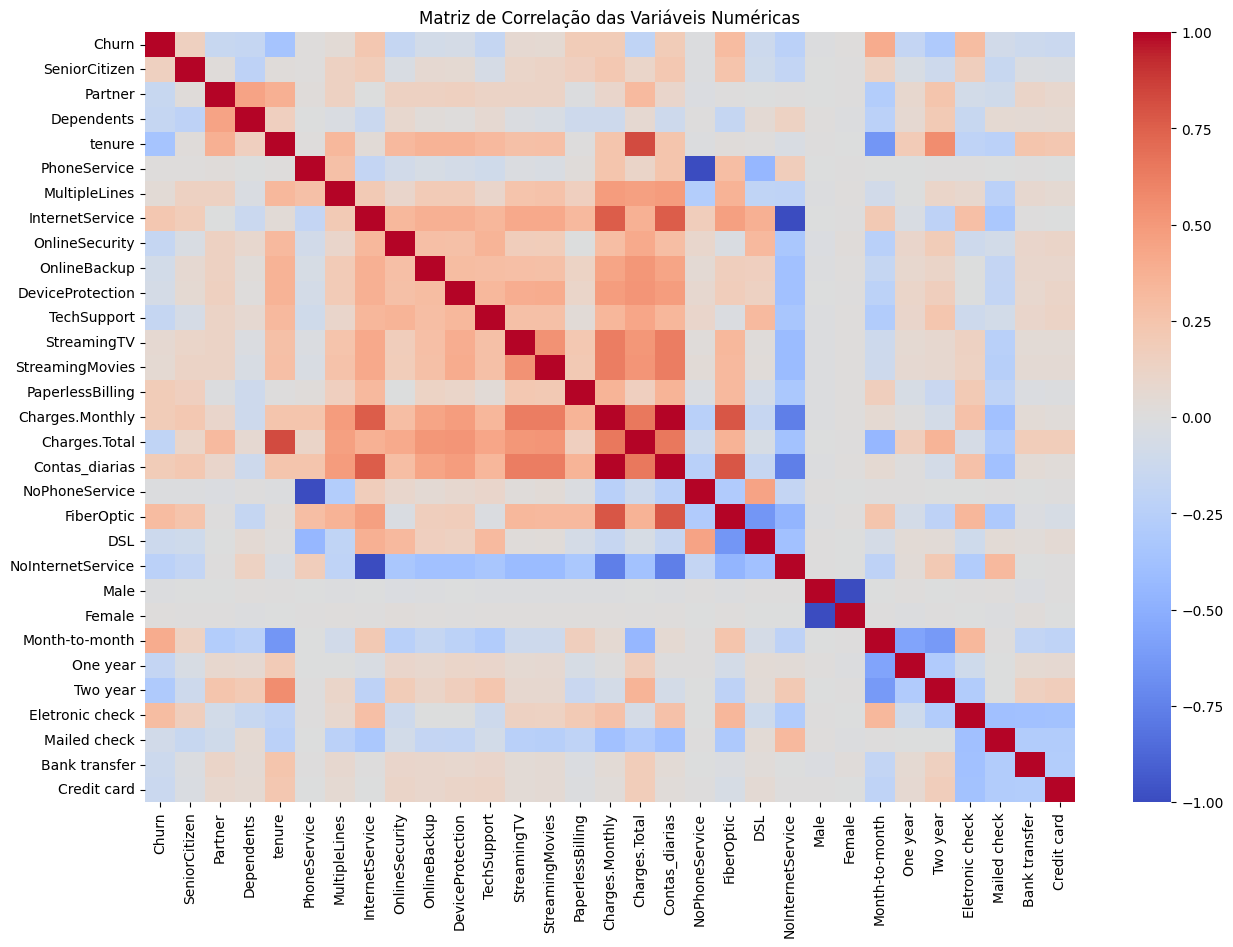

In [226]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()